# CNN에서 커널 사이즈의 홀수/짝수 차이

CNN에서 홀수 커널을 선호하는 주된 이유

1. 중심점 문제

    - 홀수 크기 필터(예: 3x3, 5x5)는 명확한 중심점이 있지만, 짝수 크기 필터(예: 2x2, 4x4)는 중심점을 정의할 수 없습니다.

    - 중심점이 없으면 필터의 위치를 정의하기 어렵고, 이는 컨볼루션 연산에서 문제가 됩니다1.

2. 패딩 계산의 문제
    - Same 패딩을 적용할 때 패딩 크기는 $(f−1)/2$로 계산됩니다

    - 필터 크기(f)가 짝수일 경우, 이 계산식으로는 정수값이 나오지 않아 왼쪽과 오른쪽(또는 위와 아래)에 서로 다른 크기의 패딩을 적용해야 합니다

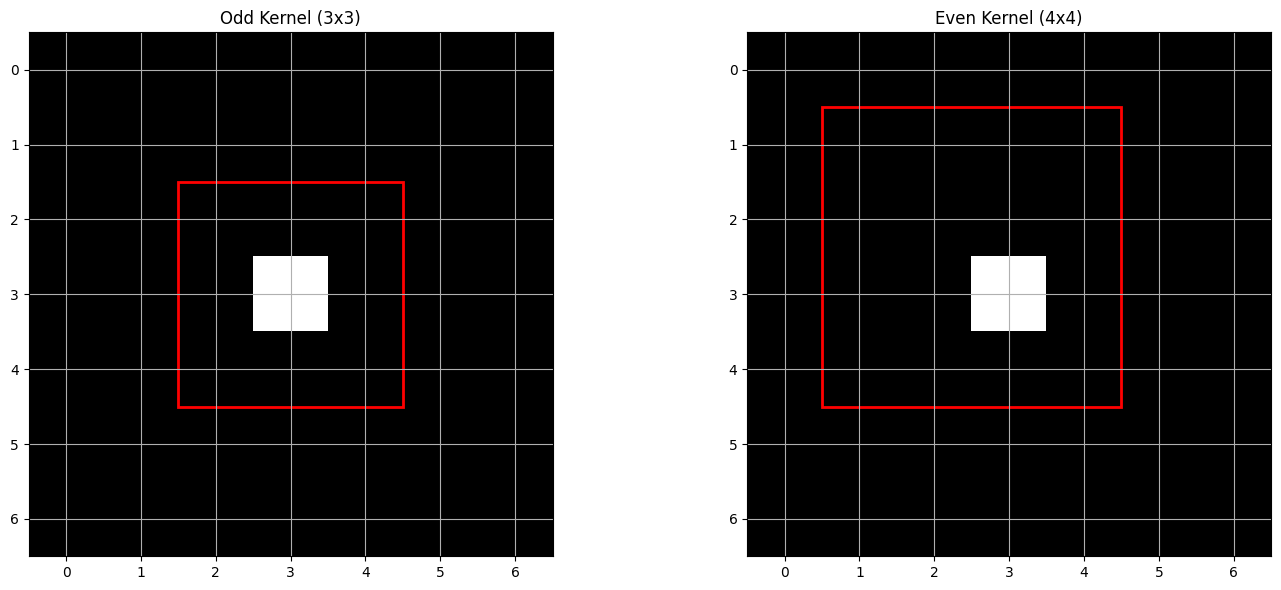

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 입력 이미지 크기 설정
input_size = 7
center = input_size // 2

# 입력 이미지 생성 (중앙에 1을 표시)
input_array = np.zeros((input_size, input_size))
input_array[center, center] = 1

# 그래프 생성
plt.figure(figsize=(15, 6))

# 3x3 홀수 커널 시각화
plt.subplot(121)
plt.imshow(input_array, cmap='gray')
kernel_size = 3
kernel_start = center - kernel_size // 2

# 3x3 커널 영역 표시 (빨간색 사각형)
rect = Rectangle((kernel_start-0.5, kernel_start-0.5),
                kernel_size, kernel_size,
                fill=False, color='red', linewidth=2)
plt.gca().add_patch(rect)

# 그리드 표시
plt.grid(True)
plt.title('Odd Kernel (3x3)')

# 4x4 짝수 커널 시각화
plt.subplot(122)
plt.imshow(input_array, cmap='gray')
kernel_size = 4
kernel_start = center - kernel_size // 2

# 4x4 커널 영역 표시 (빨간색 사각형)
rect = Rectangle((kernel_start-0.5, kernel_start-0.5),
                kernel_size, kernel_size,
                fill=False, color='red', linewidth=2)
plt.gca().add_patch(rect)

# 그리드 표시
plt.grid(True)
plt.title('Even Kernel (4x4)')

plt.tight_layout()
plt.show()

CNN에서 커널 크기에 따른 출력 크기와 중심점 위치를 수식적으로 설명

1. 출력 크기 계산 공식
기본적인 컨볼루션 연산에서 출력 크기는 다음 공식으로 계산됩니다.

    ```
    Output size = ((W - K + 2P)/S) + 1

    여기서:
    W: 입력 크기
    K: 커널 크기
    P: 패딩 크기
    S: 스트라이드
    ```

2. 중심점 위치 계산 패딩이 없고 스트라이드가 1일 때

- 홀수 커널(예: 3x3)의 경우
    ```
    중심점 index = K//2 = 3//2 = 1
    - 3x3 커널에서 중심점은 (1,1) 위치
    - 입력값의 각 위치에서 정확히 대칭적으로 1칸씩 볼 수 있음
    ```

- 짝수 커널(예: 4x4)의 경우
    ```
    중심점 index = K//2 = 4//2 = 2
    - 4x4 커널에서 정확한 중심이 없음 (2,2)와 (1,1) 사이
    - 비대칭적인 receptive field 발생
    ```

3. 패딩 계산 Same 패딩을 사용할 때 필요한 패딩 크기

    ```
    홀수 커널

    P = (K-1)/2
    예: 3x3 커널
    P = (3-1)/2 = 1
    - 양쪽에 정확히 1픽셀씩 패딩 가능
    ```

    ```
    짝수 커널

    P = (K-1)/2 = 1.5
    예: 4x4 커널
    - 정수가 아닌 패딩이 필요
    - 양쪽 패딩을 다르게 해야 함 (비대칭)
    ```

- 그래서, 4x4 필터를 사용하는 경우, 1 [왼쪽/위쪽: 1픽셀 패딩] /  2 [오른쪽/아래쪽: 2픽셀 패딩] 이러한 하나의 패딩이 아닌 비대칭 패딩을 해주어야 합니다.

4. (우리가 지향하는 바) Receptive Field 계산 단일 레이어에서의 receptive field 크기

```
RF = K

여러 레이어를 쌓았을 때:
RF_n = RF_(n-1) + (K-1)

예: 3x3 커널 3층
Layer1: RF = 3
Layer2: RF = 3 + (3-1) = 5
Layer3: RF = 5 + (3-1) = 7
```



5. 특징맵(Feature Map) 위치 & 입력과 출력 간의 위치 관계

    - 홀수 커널
    ```
    출력 위치 = floor((입력 위치 + 2P - K)/S) + 1

    3x3 커널, P=1, S=1의 경우:
    중심픽셀 위치가 정확히 보존됨
    입력 (x,y) -> 출력 (x,y)
    ```

    - 짝수 커널
    ```
    4x4 커널의 경우:
    중심픽셀이 커널 격자 사이에 위치
    위치 매핑에 0.5픽셀 오프셋 발생
    ```

이러한 수식적 특성들로 인해 CNN에서 홀수 커널이 선호 합니다.

1. 대칭적 receptive field
2. 정수 패딩 가능
3. 정확한 중심점 존재
4. 위치 정보 보존
5. 계층적 특징 추출의 용이성

이러한 수학적 특성들이 실제 네트워크의 학습과 성능에 영향을 미치며, 이는 특히 깊은 네트워크에서 더욱 중요해집니다.

- [Convolutional Neural Networks(CNN)](https://junstar92.tistory.com/92)
- [Foundations of Convolutional Neural Networks](https://velog.io/@findingflow/Foundations-of-Convolutional-Neural-Networks)
- [004 CNN Padding](https://datahacker.rs/what-is-padding-cnn/)